# Imports

In [ ]:
from sklearn.datasets import load_wine
import pandas as pd

# Loading the Data

In [ ]:
wine = load_wine()
df = pd.DataFrame(wine.data, columns=wine.feature_names)

# Task 1 - EDA (2 points)
Perform basic Exploratory Data Analysis (EDA)
- check dataset size, columns and their datatypes
- check unique values
- check missing values, and if they are - apply some imputation strategy
- check if there some catgorical features, and if they are - apply some category encoding strategy
- check the distributions for features
- check correlation for features

In [ ]:
# check dataset size, columns and their datatypes
print(f'Dataset size {df.shape}')
df.dtypes

Dataset size (178, 13)


,0
alcohol,float64
malic_acid,float64
ash,float64
alcalinity_of_ash,float64
magnesium,float64
total_phenols,float64
flavanoids,float64
nonflavanoid_phenols,float64
proanthocyanins,float64
color_intensity,float64


In [ ]:
# check unique values
df.nunique().sort_values()

,0
nonflavanoid_phenols,39
magnesium,53
alcalinity_of_ash,63
hue,78
ash,79
total_phenols,97
proanthocyanins,101
proline,121
od280/od315_of_diluted_wines,122
alcohol,126


In [ ]:
from sklearn.impute import SimpleImputer

# check missing values, and if they are - apply some imputation strategy
print(df.isna().sum())

# no missing values, it were any I would use:
# num_cols = df.select_dtypes(include='number').columns
# imputer = SimpleImputer(strategy='mean')
# df[num_cols] = imputer.fit_transform(df[num_cols])

alcohol                         0
malic_acid                      0
ash                             0
alcalinity_of_ash               0
magnesium                       0
total_phenols                   0
flavanoids                      0
nonflavanoid_phenols            0
proanthocyanins                 0
color_intensity                 0
hue                             0
od280/od315_of_diluted_wines    0
proline                         0
dtype: int64


In [ ]:
# check if there some catgorical features, and if they are - apply some category encoding strategy
df.select_dtypes(include=['object']).columns.tolist()

# no categorical features, all are numberic
# from sklearn.preprocessing import OneHotEncoder
# df = pd.get_dummies(df, columns=cat_cols, drop_first=True)

[]

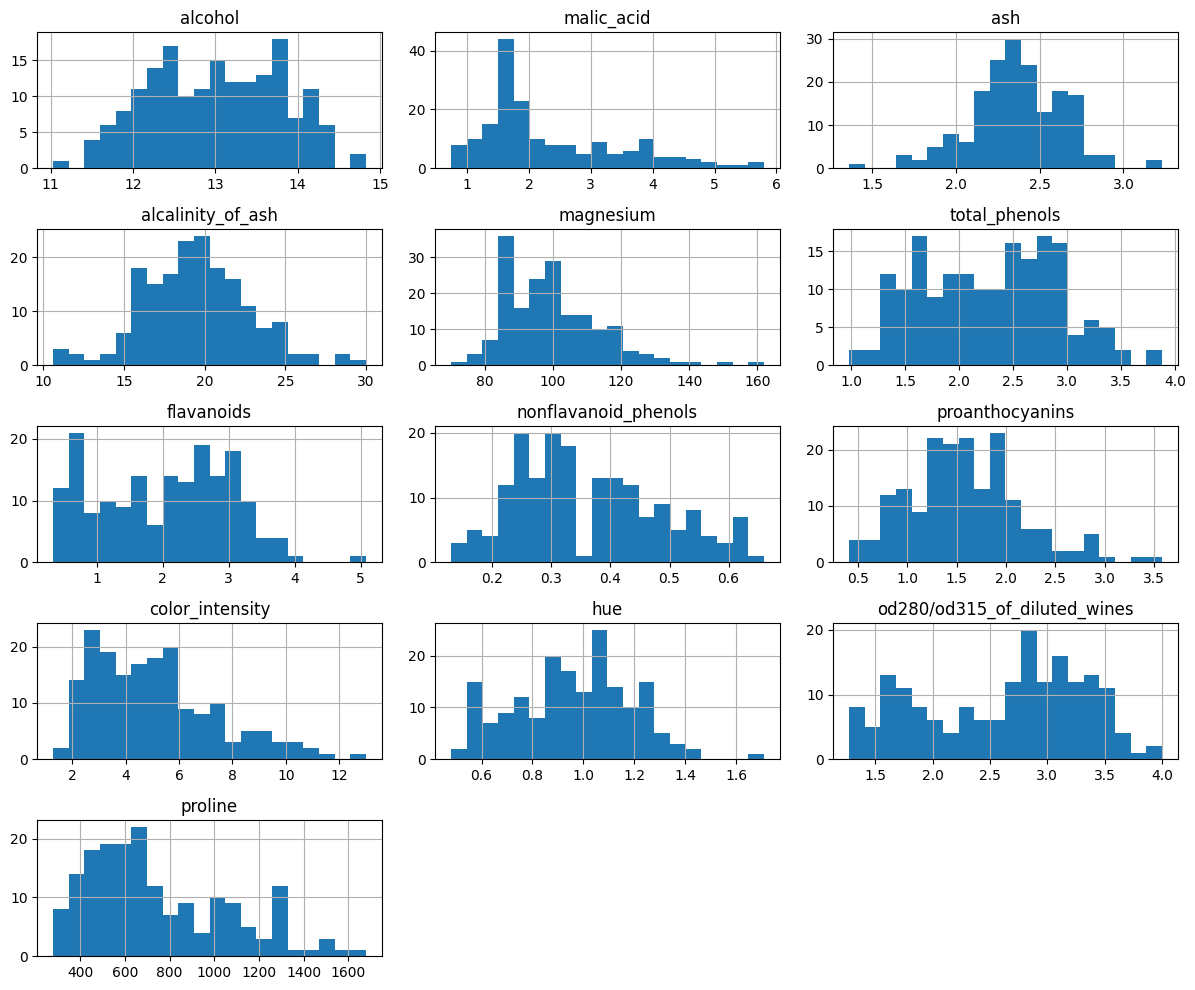

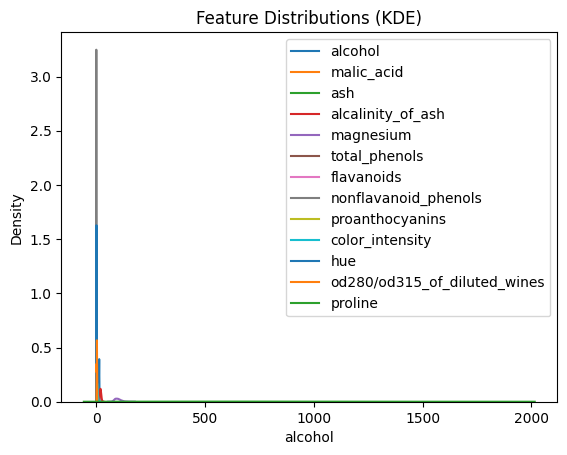

In [ ]:
# check the distributions for features

import matplotlib.pyplot as plt

# 5.a Quick global view
df.hist(figsize=(12,10), bins=20, layout=(5,3))
plt.tight_layout()
plt.show()

# 5.b Or individual KDE plots
import seaborn as sns
for col in wine.feature_names:
    sns.kdeplot(df[col], label=col)
plt.legend()
plt.title("Feature Distributions (KDE)")
plt.show()

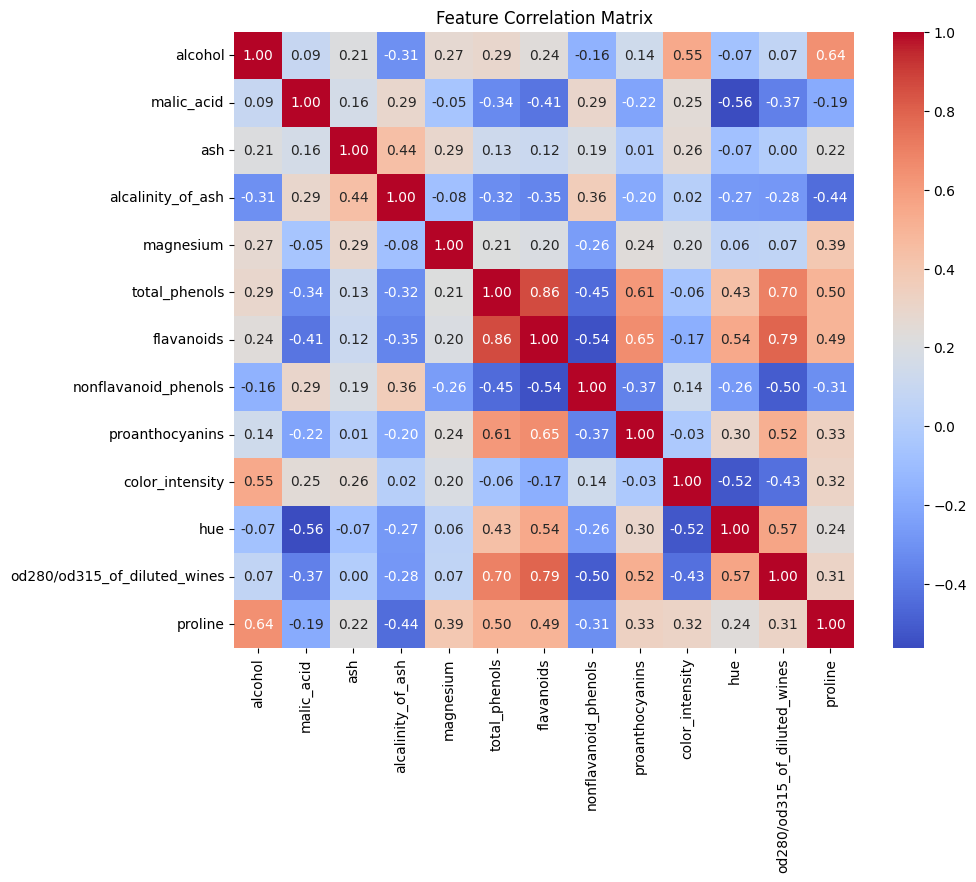

In [ ]:
# check correlation for features
import seaborn as sns

corr = df[wine.feature_names].corr()
plt.figure(figsize=(10,8))
sns.heatmap(corr, annot=True, fmt=".2f", cmap="coolwarm")
plt.title("Feature Correlation Matrix")
plt.show()

# Task 2 - Data Scaling (2 points)
Use sklearn StandardScaler to correctly standardise the data

In [ ]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
df_scaled = scaler.fit_transform(df)

# Task 3 - Simple KMeans flow (2 points)
Implement simple sklearn KMeans clustering algorithm with default (or some arbitrary) number of clusters and check the distribution of clusters. Don't forget to use normalized data for it

In [ ]:
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

kmeans = KMeans(n_clusters=3, random_state=42)
labels_kmeans = kmeans.fit_predict(df_scaled)

inertia = kmeans.inertia_
sil_score = silhouette_score(df_scaled, labels_kmeans)

print(f"Inertia: {inertia:.2f}")
print(f"Silhouette Score: {sil_score:.3f}")

Inertia: 1277.93
Silhouette Score: 0.285


# Task 4 - Evaluate Clustering Results (2 points)
- Check the inertia value
- Check the silhouette score
- Apply PCA to reduce dimentionality to 2D or 3D and visualize clustering results

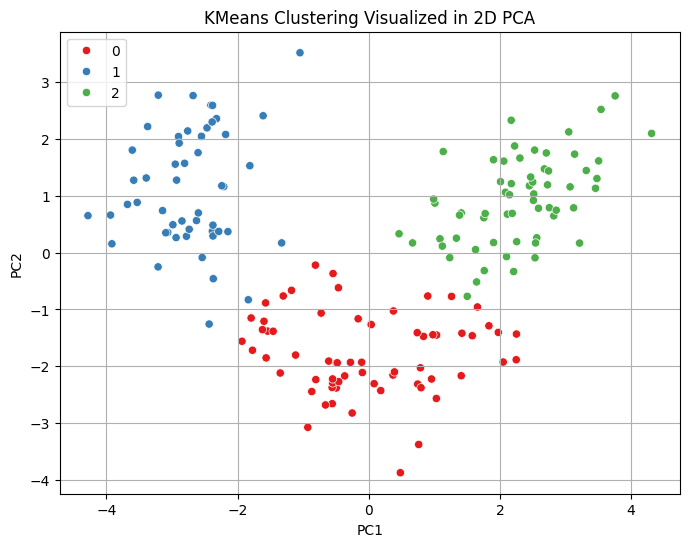

In [ ]:
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
import seaborn as sns

pca_2d = PCA(n_components=2)
df_pca_2d = pca_2d.fit_transform(df_scaled)

plt.figure(figsize=(8, 6))
sns.scatterplot(x=df_pca_2d[:, 0], y=df_pca_2d[:, 1], hue=labels_kmeans, palette="Set1")
plt.title("KMeans Clustering Visualized in 2D PCA")
plt.xlabel("PC1")
plt.ylabel("PC2")
plt.grid(True)
plt.show()

# Task 5 - Dimensionality Reduction with PCA (2 points)
- Apply PCA to normalized data
- Try different number of components and check the explained variance
- Select optimal value for number of components, fit the PCA and check the loadings for principal components

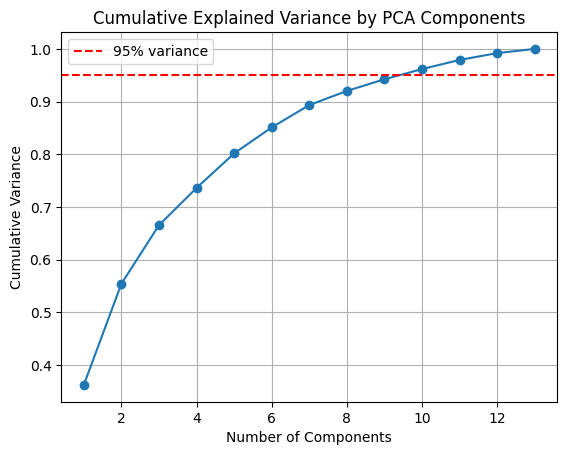

Number of components to keep 95% variance: 10


In [ ]:
pca_full = PCA()
pca_full.fit(df_scaled)

explained_var = pca_full.explained_variance_ratio_.cumsum()

plt.plot(range(1, len(explained_var)+1), explained_var, marker='o')
plt.axhline(0.95, linestyle='--', color='red', label='95% variance')
plt.title("Cumulative Explained Variance by PCA Components")
plt.xlabel("Number of Components")
plt.ylabel("Cumulative Variance")
plt.grid(True)
plt.legend()
plt.show()

n_components = (explained_var >= 0.95).argmax() + 1
print(f"Number of components to keep 95% variance: {n_components}")

# Task 6 - Dimensionality Reduction + Clustering (2 points)
- Apply clustering to PCA-transformed data
- Check the same metrics as in previous task and visualize the results
- Select better approach (with PCA or without)

KMeans (PCA) Inertia: 1189.64
KMeans (PCA) Silhouette Score: 0.299


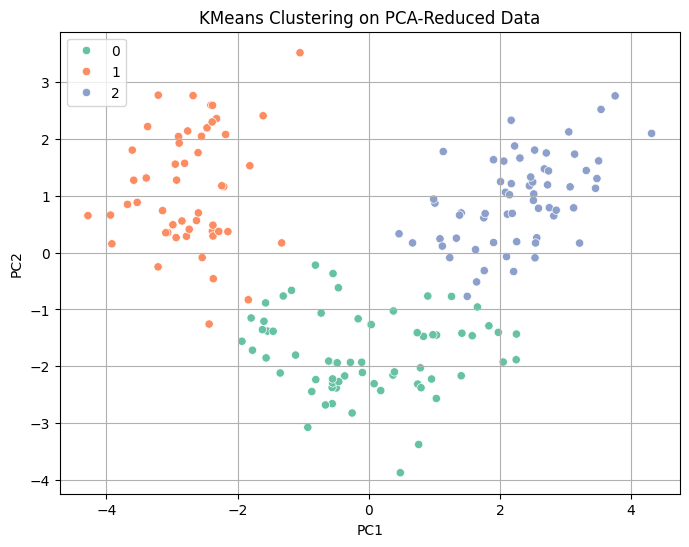

In [ ]:
pca = PCA(n_components=n_components)
df_pca = pca.fit_transform(df_scaled)

kmeans_pca = KMeans(n_clusters=3, random_state=42)
labels_pca = kmeans_pca.fit_predict(df_pca)

inertia_pca = kmeans_pca.inertia_
sil_pca = silhouette_score(df_pca, labels_pca)

print(f"KMeans (PCA) Inertia: {inertia_pca:.2f}")
print(f"KMeans (PCA) Silhouette Score: {sil_pca:.3f}")

plt.figure(figsize=(8, 6))
sns.scatterplot(x=df_pca[:, 0], y=df_pca[:, 1], hue=labels_pca, palette="Set2")
plt.title("KMeans Clustering on PCA-Reduced Data")
plt.xlabel("PC1")
plt.ylabel("PC2")
plt.grid(True)
plt.show()

# Task 7 - Elbow Rule (2 points)
- Use Elbow Rule to define the optimal number of clusters
- Train KMeans and check the same metrics and visualizations

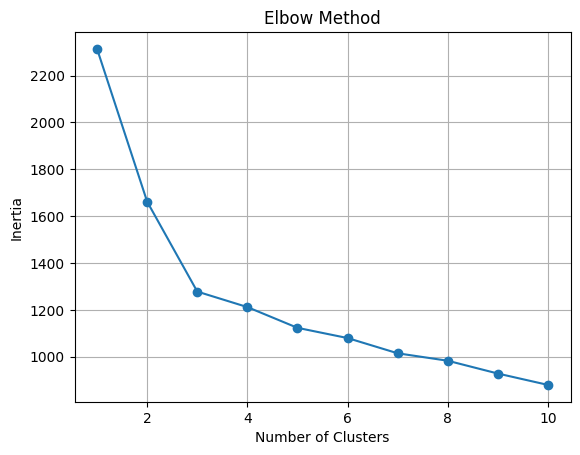

In [ ]:
inertias = []
for k in range(1, 11):
    km = KMeans(n_clusters=k, random_state=42).fit(df_scaled)
    inertias.append(km.inertia_)

plt.plot(range(1, 11), inertias, marker='o')
plt.title("Elbow Method")
plt.xlabel("Number of Clusters")
plt.ylabel("Inertia")
plt.grid(True)
plt.show()

# Task 8 - Using Pipeline (2 points)
- Use sklearn Pipeline to combine StandardScaler + PCA + KMeans with previously defined parameters
- Fit the pipeline to the data
- Make final visualization

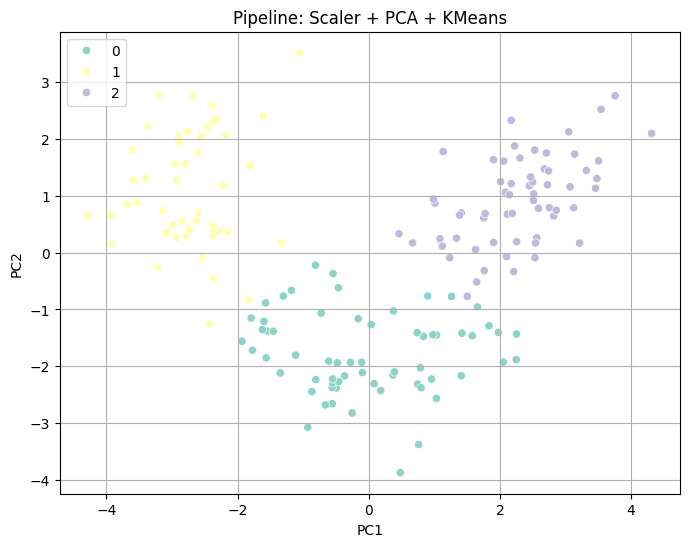

In [ ]:
from sklearn.pipeline import Pipeline

pipeline = Pipeline([
    ("scaler", StandardScaler()),
    ("pca", PCA(n_components=n_components)),
    ("kmeans", KMeans(n_clusters=3, random_state=42))
])
pipeline.fit(df)

labels_pipeline = pipeline.named_steps["kmeans"].labels_
df_pca_pipeline = pipeline.named_steps["pca"].transform(
    pipeline.named_steps["scaler"].transform(df)
)

plt.figure(figsize=(8, 6))
sns.scatterplot(x=df_pca_pipeline[:, 0], y=df_pca_pipeline[:, 1], hue=labels_pipeline, palette="Set3")
plt.title("Pipeline: Scaler + PCA + KMeans")
plt.xlabel("PC1")
plt.ylabel("PC2")
plt.grid(True)
plt.show()

# Task 9 - DBSCAN (2 points)
Try to apply sklearn DBSCAN or any other algorithm and compare the results and select the best

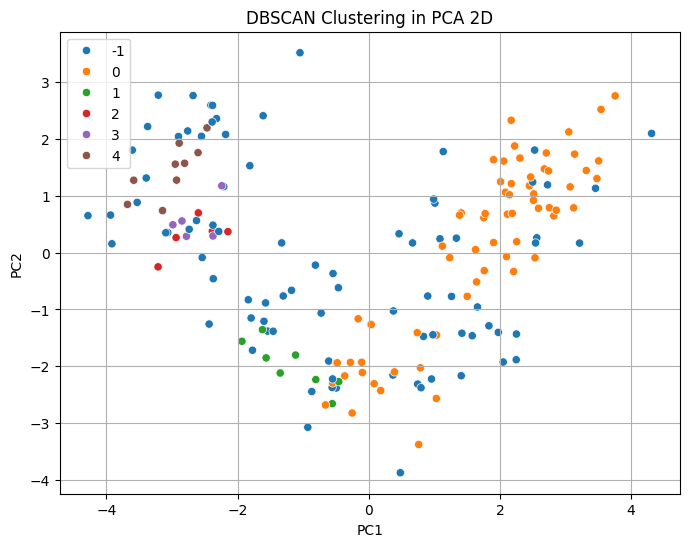

DBSCAN clusters: 5
DBSCAN noise points: 85


In [ ]:
from sklearn.cluster import DBSCAN

db = DBSCAN(eps=2, min_samples=5)
labels_dbscan = db.fit_predict(df_scaled)

plt.figure(figsize=(8, 6))
sns.scatterplot(x=df_pca_2d[:, 0], y=df_pca_2d[:, 1], hue=labels_dbscan, palette="tab10")
plt.title("DBSCAN Clustering in PCA 2D")
plt.xlabel("PC1")
plt.ylabel("PC2")
plt.grid(True)
plt.show()

n_clusters_db = len(set(labels_dbscan)) - (1 if -1 in labels_dbscan else 0)
n_noise = list(labels_dbscan).count(-1)

print(f"DBSCAN clusters: {n_clusters_db}")
print(f"DBSCAN noise points: {n_noise}")

# Task 10 - Analysis (2 points)
Perform all necessary analysis and write a few-paragraph description of clustering results

In [ ]:
print("Final Comparison Summary:")
print(f"KMeans (original data) Silhouette Score: {sil_score:.3f}")
print(f"KMeans (PCA data)      Silhouette Score: {sil_pca:.3f}")
print(f"DBSCAN - Clusters: {n_clusters_db}, Noise Points: {n_noise}")

if sil_pca > sil_score:
    print("PCA + KMeans gave better clustering based on silhouette score.")
else:
    print("Original KMeans gave better clustering.")

print("DBSCAN found", n_clusters_db, "clusters and", n_noise, "noise points.")

Final Comparison Summary:
KMeans (original data) Silhouette Score: 0.285
KMeans (PCA data)      Silhouette Score: 0.299
DBSCAN - Clusters: 5, Noise Points: 85
PCA + KMeans gave better clustering based on silhouette score.
DBSCAN found 5 clusters and 85 noise points.
